In [193]:
# Import necessary libraries
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the penguins dataset
df = sns.load_dataset("penguins")
df.dropna(inplace=True)

# Filter rows for 'Adelie' and 'Chinstrap' species
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy()

# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the species column
y_encoded = le.fit_transform(df_filtered['species'])
df_filtered['class_encoded'] = y_encoded

# Display the filtered and encoded DataFrame
print(df_filtered[['species', 'class_encoded']])

# Split the data into features (X) and target variable (y)
y = df_filtered['class_encoded']
X = df_filtered.drop(['species', 'class_encoded'], axis=1)
print(df_filtered.head())


       species  class_encoded
0       Adelie              0
1       Adelie              0
2       Adelie              0
4       Adelie              0
5       Adelie              0
..         ...            ...
215  Chinstrap              1
216  Chinstrap              1
217  Chinstrap              1
218  Chinstrap              1
219  Chinstrap              1

[214 rows x 2 columns]
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  class_encoded  
0       3750.0    Male              0  
1       3800.0  Female              0  
2       3250.0  Female              0  
4       345

In [197]:
# Find distinct values in the 'island' column
distinct_islands = df_filtered['island'].unique()
print("Distinct islands:", distinct_islands)

Distinct islands: ['Torgersen' 'Biscoe' 'Dream']


In [195]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the logistic regression model using 'saga' solver
logreg = LogisticRegression(solver='saga')
logreg.fit(X_train, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print learned coefficients and intercept
print("Coefficients:", logreg.coef_)
print("Intercept:", logreg.intercept_)


ValueError: could not convert string to float: 'Dream'

In [196]:
# Suppose your X has the island column
X = df_filtered.drop(['species', 'class_encoded'], axis=1)

# One-hot encode categorical columns
X = pd.get_dummies(X, columns=['sex', 'island'], drop_first=True)


In [202]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the logistic regression model using 'saga' solver
logreg = LogisticRegression(solver='saga')
logreg.fit(X_train, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print learned coefficients and intercept
print("Coefficients:", logreg.coef_)
print("Intercept:", logreg.intercept_)

Accuracy: 0.5813953488372093
Coefficients: [[ 2.76030223e-03 -8.29906556e-05  4.57015786e-04 -2.86288994e-04
   1.06547826e-05  1.85614621e-04 -1.04859055e-04]]
Intercept: [-8.55314402e-06]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [22]:
#using liblinear solver

# Train the logistic regression model using 'liblinear' solver
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print learned coefficients and intercept
print("Coefficients:", logreg.coef_)
print("Intercept:", logreg.intercept_)

Accuracy: 1.0
Coefficients: [[ 1.49723197 -1.38552253 -0.14189736 -0.00358836 -0.22200241  0.72186522
  -0.5519592 ]]
Intercept: [-0.07582277]


In [206]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression with scaled data
logreg_liblinear = LogisticRegression(solver="liblinear", max_iter=500)
logreg_saga = LogisticRegression(solver="saga", max_iter=500)

logreg_liblinear.fit(X_train_scaled, y_train)
logreg_saga.fit(X_train_scaled, y_train)

# Evaluate
y_pred_liblinear = logreg_liblinear.predict(X_test_scaled)
y_pred_saga = logreg_saga.predict(X_test_scaled)

print("Liblinear Accuracy (scaled):", accuracy_score(y_test, y_pred_liblinear))
print("Saga Accuracy (scaled):", accuracy_score(y_test, y_pred_saga))

Liblinear Accuracy (scaled): 1.0
Saga Accuracy (scaled): 1.0


## Question 3

In [207]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)

# Apply a linear transformation
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)


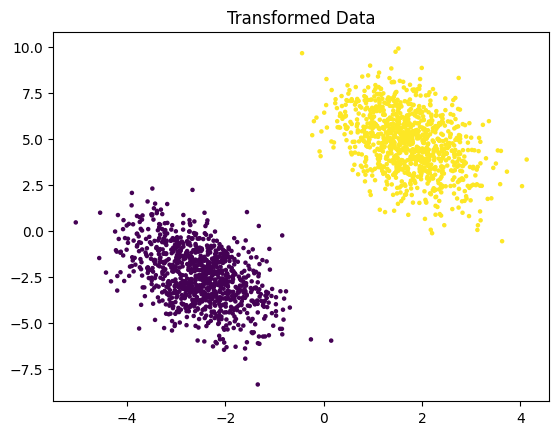

In [208]:
#visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=5)
plt.title("Transformed Data")
plt.show()

In [89]:
# Print first 5 entries
print("y:", y[:5])
print("X:", X[:5])


y: [0 1 1 0 1]
X: [[-2.19655439 -6.04817613]
 [ 0.81789766  4.8792503 ]
 [ 2.8314302   5.80299161]
 [-2.17405112 -6.11864355]
 [ 1.39572564  5.76178384]]


In [ ]:
import math

#sigmoid function for logistic regression
def sigmoid(z):
    return 1 / (1 + np.exp(-z)) 

#compute cost function for logistic regression
def compute_cost(X, y, w, b, lambda_):
    m, n = X.shape
    total_cost = 0
     
    for i in range(m):
        z_wb = np.dot(w,X[i])+b
        f_wb = sigmoid(z_wb)
        loss = -y[i]*np.log(f_wb + 1e-15)-(1-y[i])*np.log(1-f_wb + 1e-15)
        total_cost += loss
    total_cost = total_cost/m

    return total_cost

#compute gradient for logistic regression
def compute_gradient(X, y, w, b): 
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    for i in range(m):
        z_wb = 0
        for j in range(n): 
            z_wb += w[j]*X[i,j]
        z_wb += b
        f_wb = sigmoid(z_wb)
        dj_db_i = f_wb-y[i]
        dj_db += dj_db_i
        for j in range(n):
            dj_dw[j] = (f_wb-y[i])*X[i,j]+dj_dw[j]

    dj_dw = dj_dw/m
    dj_db = dj_db/m
    return dj_db, dj_dw

def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 

    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.4f}   ")

    return w_in, b_in, J_history, w_history


In [178]:
#find weights and bias using gradient descent with learning rate 0.1 and 20 iterations

initial_w = 0.01 * np.random.randn(2)
initial_b = 0
alpha = 0.5
num_iters = 20
lambda_ = 0.0

w_final, b_final, J_history_gd, w_hist_gd = gradient_descent(X, y, initial_w, initial_b, compute_cost, compute_gradient, alpha, num_iters, lambda_)
print(f"w_final: {w_final} b_final: {b_final}")

print(J_history_gd)

Iteration    0: Cost   0.0363   
Iteration    2: Cost   0.0285   
Iteration    4: Cost   0.0235   
Iteration    6: Cost   0.0201   
Iteration    8: Cost   0.0176   
Iteration   10: Cost   0.0157   
Iteration   12: Cost   0.0141   
Iteration   14: Cost   0.0129   
Iteration   16: Cost   0.0119   
Iteration   18: Cost   0.0110   
Iteration   19: Cost   0.0106   
w_final: [0.93652062 1.07983509] b_final: -0.1014985966962305
[0.03629492659565531, 0.031890645527756147, 0.028485276154534486, 0.025768504323942492, 0.02354762669311557, 0.021696313696013866, 0.020128132684850298, 0.018781863373009494, 0.017612881047504594, 0.01658786151592822, 0.01568139945054054, 0.014873776915393443, 0.014149448856847106, 0.013495989729314437, 0.012903344925911518, 0.012363288585144913, 0.011869024144434304, 0.011414885531332174, 0.010996110533580822, 0.010608666747080478]


In [180]:
# Compute gradient and Hessian for logistic regression
def compute_gradient_hessian(X, y, w, b):
    m, n = X.shape
    grad_w = np.zeros(w.shape)
    grad_b = 0.
    H = np.zeros((n, n))  # Hessian

    for i in range(m):
        z = np.dot(w, X[i]) + b
        f = sigmoid(z)
        error = f - y[i]

        # Gradient
        grad_b += error
        grad_w += error * X[i]

        # Hessian
        R_i = f * (1 - f)
        H += np.outer(X[i], X[i]) * R_i

    # Average over samples
    grad_w /= m
    grad_b /= m
    H /= m

    return grad_b, grad_w, H

# Newton's Method
def newtons_method(X, y, w_in, b_in, cost_function, num_iters=20):
    J_history = []
    w_history = []

    for i in range(num_iters):
        # Compute gradient and Hessian
        grad_b, grad_w, H = compute_gradient_hessian(X, y, w_in, b_in)

        # Update weights using Newton's method
        w_in = w_in - np.linalg.pinv(H) @ grad_w
        b_in = b_in - grad_b  # bias update (can also include in Hessian if desired)

        # Compute cost
        cost = cost_function(X, y, w_in, b_in, 0)
        J_history.append(cost)

        # Save and print
        if i % math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {cost:.6f}")

    return w_in, b_in, J_history


# Initialize weights and bias
w_init = 0.01 * np.random.randn(2)
b_init = 0.

# Run Newton's method
w_final, b_final, J_hist_nm = newtons_method(X, y, w_init, b_init, compute_cost, num_iters=20)
print("Final Weights:", w_final)
print("Final Bias:", b_final)

Iteration    0: Cost 0.145294
Iteration    2: Cost 0.020324
Iteration    4: Cost 0.003207
Iteration    6: Cost 0.000539
Iteration    8: Cost 0.000097
Iteration   10: Cost 0.000018
Iteration   12: Cost 0.000003
Iteration   14: Cost 0.000000
Iteration   16: Cost 0.000000
Iteration   18: Cost 0.000000
Iteration   19: Cost 0.000000
Final Weights: [13.2251697   3.63384849]
Final Bias: -0.005787422898714113


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import numpy as np

logreg = LogisticRegression(
    solver='newton-cg',
    max_iter=1,       # only one iteration per fit
    warm_start=True,  # reuse previous solution
)

J_history_newton = []

# Run for 20 iterations
for i in range(20):
    logreg.fit(X, y)  # does one iteration
    y_prob = logreg.predict_proba(X)[:, 1]  # predicted probabilities
    loss = log_loss(y, y_prob)
    J_history_newton.append(loss)
    print(f"Iteration {i+1}: Cost = {loss:.6f}")

print(J_history_newton)


Iteration 1: Loss = 0.182106
Iteration 2: Loss = 0.073058
Iteration 3: Loss = 0.029508
Iteration 4: Loss = 0.011871
Iteration 5: Loss = 0.004869
Iteration 6: Loss = 0.002118
Iteration 7: Loss = 0.001062
Iteration 8: Loss = 0.000701
Iteration 9: Loss = 0.000608
Iteration 10: Loss = 0.000608
Iteration 11: Loss = 0.000608
Iteration 12: Loss = 0.000608
Iteration 13: Loss = 0.000608
Iteration 14: Loss = 0.000608
Iteration 15: Loss = 0.000608
Iteration 16: Loss = 0.000608
Iteration 17: Loss = 0.000608
Iteration 18: Loss = 0.000608
Iteration 19: Loss = 0.000608
Iteration 20: Loss = 0.000608
[0.18210598388094826, 0.07305833802262456, 0.029507704989717446, 0.011871389093220793, 0.004868636764493129, 0.0021184169504442824, 0.0010620120375511852, 0.00070072783043218, 0.0006083505635571886, 0.0006083505635571886, 0.0006083505635571886, 0.0006083505635571886, 0.0006083505635571886, 0.0006083505635571886, 0.0006083505635571886, 0.0006083505635571886, 0.0006083505635571886, 0.0006083505635571886, 0.0

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/optimize.py:318: ConvergenceWarning: newton-cg failed to converge at loss = 0.18215027419176522. Increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/optimize.py:318: ConvergenceWarning: newton-cg failed to converge at loss = 0.07318754922033664. Increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/optimize.py:318: ConvergenceWarning: newton-cg failed to converge at loss = 0.029772484041276966. Increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/optimize.py:318: ConvergenceWarning: newton-cg failed to converge at loss = 0.012329059329872712. Increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python

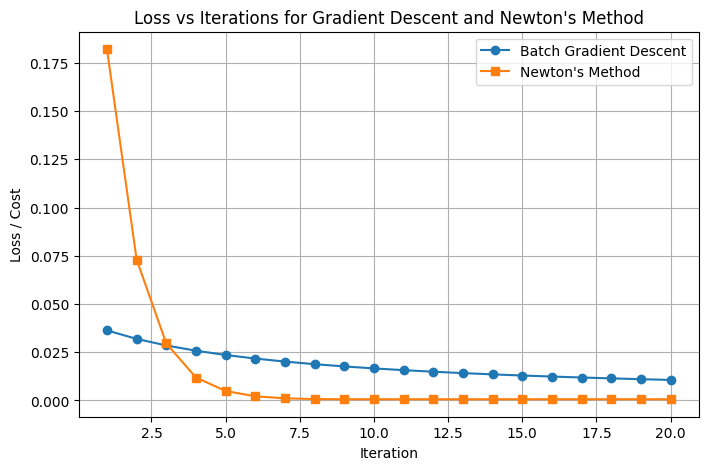

In [ ]:
iterations_gd = range(1, len(J_history_gd)+1)
iterations_newton = range(1, len(J_history_newton)+1)

# Plot
plt.figure(figsize=(8,5))
plt.plot(iterations_gd, J_history_gd, marker='o', label='Batch Gradient Descent')
plt.plot(iterations_newton, J_history_newton, marker='s', label="Newton's Method")
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Loss vs Iterations for Gradient Descent and Newton\'s Method')
plt.legend()
plt.grid(True)
plt.show()

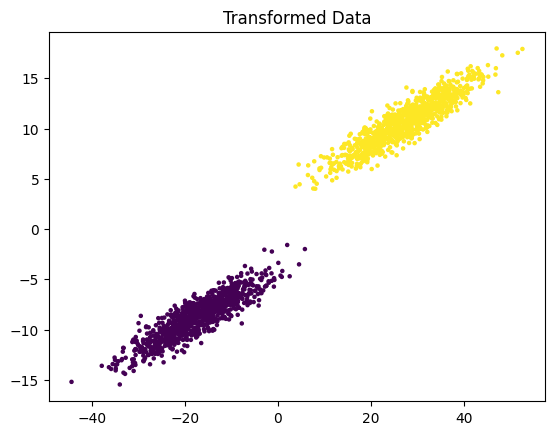

In [209]:
# Apply a linear transformation
transformation = [[2, 2], [5, 1.5]]
X_transformed = np.dot(X, transformation)

#visualize the data
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, s=5)
plt.title("Transformed Data")
plt.show()

In [190]:
initial_w = 0.01 * np.random.randn(2)
initial_b = 0
alpha = 0.5
num_iters = 20
lambda_ = 0.0

w_final_2, b_final_2, J_history_gd_2, w_hist_gd = gradient_descent(X_transformed, y, initial_w, initial_b, compute_cost, compute_gradient, alpha, num_iters, lambda_)
print(f"w_final: {w_final_2} b_final: {b_final_2}")

print(J_history_gd_2)



Iteration    0: Cost   0.3323   
Iteration    2: Cost   0.2535   
Iteration    4: Cost   0.2203   
Iteration    6: Cost   0.1994   
Iteration    8: Cost   0.1843   
Iteration   10: Cost   0.1725   
Iteration   12: Cost   0.1629   
Iteration   14: Cost   0.1549   
Iteration   16: Cost   0.1480   
Iteration   18: Cost   0.1419   
Iteration   19: Cost   0.1392   
w_final: [1.51967631 0.2495771 ] b_final: -0.6268622879459858
[0.3322605106779583, 0.281491528494259, 0.253536340919709, 0.23453923719807435, 0.22025693408930647, 0.2088594043189338, 0.19940082832819345, 0.1913325308014917, 0.18430931497547173, 0.17810044536772263, 0.1725442608581455, 0.16752314418558553, 0.16294883831288057, 0.1587533904445774, 0.15488333022453754, 0.15129579366335594, 0.14795586386635814, 0.14483469842928243, 0.14190818031940547, 0.13915592605285773]


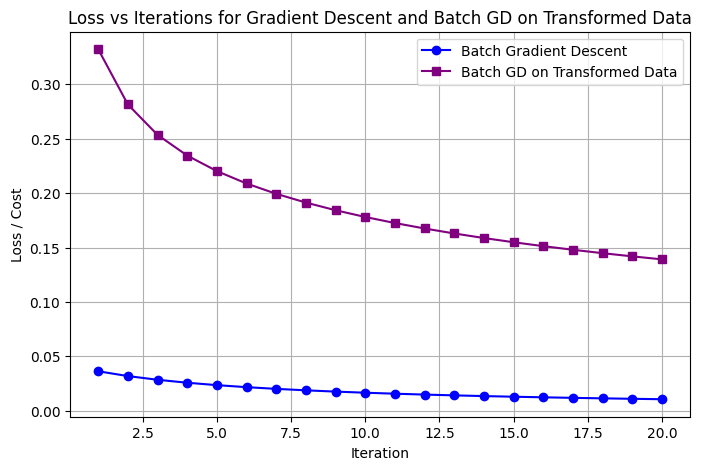

In [ ]:
iterations_gd = range(1, len(J_history_gd)+1)
iterations_gd_transformed = range(1, len(J_history_gd_2)+1)

# Plot
plt.figure(figsize=(8,5))
plt.plot(iterations_gd, J_history_gd, marker='o', color='blue', label='Batch Gradient Descent')
plt.plot(iterations_gd_transformed, J_history_gd_2, marker='s', color='purple', label="Batch GD on Transformed Data")
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Loss vs Iterations for Gradient Descent and Batch GD on Transformed Data')
plt.legend()
plt.grid(True)
plt.show()